# **Assignment 4: Simulation Optimization**

In [26]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
# Set Up File Path for External Libraries
import sys
sys.path.insert(0, '/content/drive/MyDrive/')


In [28]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from brooks import *


In [29]:
# Load Vaccine Demand Data
vaccine_demand_data = pd.read_excel("/content/drive/MyDrive/OuRx.xlsx", sheet_name="Data")
vaccine_demand_data = vaccine_demand_data[vaccine_demand_data["Vaccine Demand"] < 30000000]


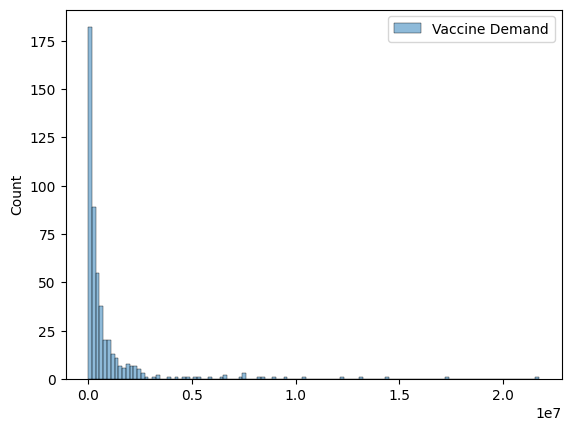

In [30]:
# Plot Vaccine Demand Distribution
demand_plot = sns.histplot(vaccine_demand_data, label="Vaccine Demand")
demand_plot.legend()
demand_plot.figure.show()

In [31]:
# Conduct Chi-Square Goodness-of-Fit Tests for Various Distributions
print("Chi-Square Goodness-of-Fit Test Results:")
# Testing uniform distribution
uniform_results = test_distribution(vaccine_demand_data["Vaccine Demand"], "uniform")
print(f"Uniform Distribution: {uniform_results}")

Chi-Square Goodness-of-Fit Test Results:
For a uniform distribution, the min estimate is 3157.000000 and the max estimate is 21738695.000000.
The test statistic for a uniform distribution is 8694.279483 and the p-value is 0.000000.
Uniform Distribution: (3157.0, 21738695.0)


In [32]:
# Testing normal distribution
normal_results = test_distribution(vaccine_demand_data["Vaccine Demand"], "normal")
print(f"Normal Distribution: {normal_results}")

For a normal distribution, the mean estimate is 924033.462926 and the standard deviation estimate is 2069466.437573.
The test statistic for a normal distribution is 2299.479433 and the p-value is 0.000000.
Normal Distribution: (924033.4629258517, 2069466.4375729202)


In [24]:
# Testing gamma distribution
gamma_results = test_distribution(vaccine_demand_data["Vaccine Demand"], "gamma")
print(f"Gamma Distribution: {gamma_results}")
(alpha, beta) = gamma_results  # Extract gamma parameters

For a gamma distribution, the alpha estimate is 0.560517 and the scale = 1/beta estimate is 1648536.845273.
The test statistic for a gamma distribution is 88.282388 and the p-value is 0.984214.
Gamma Distribution: (0.5605173251512638, 1648536.8452732263)


In [33]:
# Testing lognormal distribution
lognormal_results = test_distribution(vaccine_demand_data["Vaccine Demand"], "lognormal")
print(f"Lognormal Distribution: {lognormal_results}")
(lognormal_mean, lognormal_sigma) = lognormal_results  # Extract lognormal parameters

For a lognormal distribution, the log mean estimate is 12.622927 and the log stdev estimate is 1.486323.
The test statistic for a lognormal distribution is 29.309394 and the p-value is 1.000000.
Lognormal Distribution: (12.622926731401646, 1.4863231192380928)


In [34]:
# Set Simulation Parameters
vaccine_price = 20
vaccine_cost_per_unit = 12
order_quantities = [400000, 450000, 500000, 550000, 600000]
num_simulations = 1000  # Number of simulations per order quantity

# Initialize Random Generator
random_gen = np.random.default_rng(12345)  # Seed for reproducibility

# Run Simulation for Each Order Quantity
for order_qty in order_quantities:
    profit_simulations = []
    stockout_count = 0

    # Run Simulation Iterations
    for i in range(num_simulations):
        # Generate Demand Using Log-normal Distribution
        demand = 0
        while demand <= 0:  # Ensure positive demand
            demand = random_gen.lognormal(lognormal_mean, lognormal_sigma)

        # Calculate Revenue Based on Demand and Stock Availability
        if demand >= order_qty:
            revenue = vaccine_price * order_qty
            stockout_count += 1  # Increment stockout count if demand exceeds order quantity
        else:
            revenue = vaccine_price * demand

        # Calculate Cost and Profit
        cost = vaccine_cost_per_unit * order_qty
        profit = revenue - cost
        profit_simulations.append(profit)

    # Calculate Expected Profit and Confidence Interval
    expected_profit = np.mean(profit_simulations)
    lower_bound = np.percentile(profit_simulations, 2.5)
    upper_bound = np.percentile(profit_simulations, 97.5)

    # Calculate Probability of Stockout
    probability_of_stockout = stockout_count / num_simulations

    # Display Results for Current Order Quantity
    print(f"Order size {order_qty}")
    print(f"Expected profit: {expected_profit:.2f}")
    print(f"95% credible interval for net profit: ({lower_bound:.2f}, {upper_bound:.2f})")
    print(f"Probability of running out of the vaccine: {probability_of_stockout:.4f}\n")

Order size 400000
Expected profit: 424309.12
95% credible interval for net profit: (-4513101.11, 3200000.00)
Probability of running out of the vaccine: 0.4400

Order size 450000
Expected profit: 297391.08
95% credible interval for net profit: (-5085801.48, 3600000.00)
Probability of running out of the vaccine: 0.4000

Order size 500000
Expected profit: -56014.07
95% credible interval for net profit: (-5650710.17, 4000000.00)
Probability of running out of the vaccine: 0.3600

Order size 550000
Expected profit: -440801.61
95% credible interval for net profit: (-6275515.85, 4400000.00)
Probability of running out of the vaccine: 0.3390

Order size 600000
Expected profit: -648744.54
95% credible interval for net profit: (-6919820.42, 4800000.00)
Probability of running out of the vaccine: 0.3130

